# Analysis

Fast notebook with some tables and plots to understand better how the algorithm
behaves on different datasets and with different parallel backends.

In [1]:
import pandas as pd

df = pd.read_csv("../results/cluster_magic_8.csv")
df

,estimators,max_depth,backend,threads,nodes,train_accuracy,train_f1,test_accuracy,test_f1,train_time,train_predict_time,test_predict_time
0,8,0,ff,1,1,0.984096,0.982388,0.866456,0.846951,1675.8020,18.525560,5.477224
1,8,0,ff,2,1,0.984096,0.982388,0.866456,0.846951,924.1472,14.138560,3.577610
2,8,0,ff,4,1,0.984096,0.982388,0.866456,0.846951,471.2912,9.462628,3.244700
3,8,0,ff,8,1,0.984096,0.982388,0.866456,0.846951,239.8462,10.360372,3.772970
4,8,0,ff,16,1,0.984096,0.982388,0.866456,0.846951,239.9160,10.313500,4.961228
...,...,...,...,...,...,...,...,...,...,...,...,...
105,256,0,omp,4,1,1.000000,1.000000,0.878812,0.862193,14171.1000,109.894000,28.289020
106,256,0,omp,8,1,1.000000,1.000000,0.878812,0.862193,7314.6760,59.110160,15.055020
107,256,0,omp,16,1,1.000000,1.000000,0.878812,0.862193,3669.4420,30.440600,8.247186
108,256,0,omp,32,1,1.000000,1.000000,0.878812,0.862193,2607.4740,22.212900,6.204600


In [2]:
seq = df[df["backend"] == "seq"]

keys = ["estimators", "max_depth"]
merged = seq.merge(df, how="right", on=keys, suffixes=("_seq", "_mt"))

df["train_speedup"] = merged["train_time_seq"] / merged["train_time_mt"]
df["train_efficiency"] = df["train_speedup"] / merged["threads_mt"]

df

,estimators,max_depth,backend,threads,nodes,train_accuracy,train_f1,test_accuracy,test_f1,train_time,train_predict_time,test_predict_time,train_speedup,train_efficiency
0,8,0,ff,1,1,0.984096,0.982388,0.866456,0.846951,1675.8020,18.525560,5.477224,0.999845,0.999845
1,8,0,ff,2,1,0.984096,0.982388,0.866456,0.846951,924.1472,14.138560,3.577610,1.813068,0.906534
2,8,0,ff,4,1,0.984096,0.982388,0.866456,0.846951,471.2912,9.462628,3.244700,3.555216,0.888804
3,8,0,ff,8,1,0.984096,0.982388,0.866456,0.846951,239.8462,10.360372,3.772970,6.985902,0.873238
4,8,0,ff,16,1,0.984096,0.982388,0.866456,0.846951,239.9160,10.313500,4.961228,6.983869,0.436492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,256,0,omp,4,1,1.000000,1.000000,0.878812,0.862193,14171.1000,109.894000,28.289020,3.762555,0.940639
106,256,0,omp,8,1,1.000000,1.000000,0.878812,0.862193,7314.6760,59.110160,15.055020,7.289392,0.911174
107,256,0,omp,16,1,1.000000,1.000000,0.878812,0.862193,3669.4420,30.440600,8.247186,14.530694,0.908168
108,256,0,omp,32,1,1.000000,1.000000,0.878812,0.862193,2607.4740,22.212900,6.204600,20.448733,0.639023


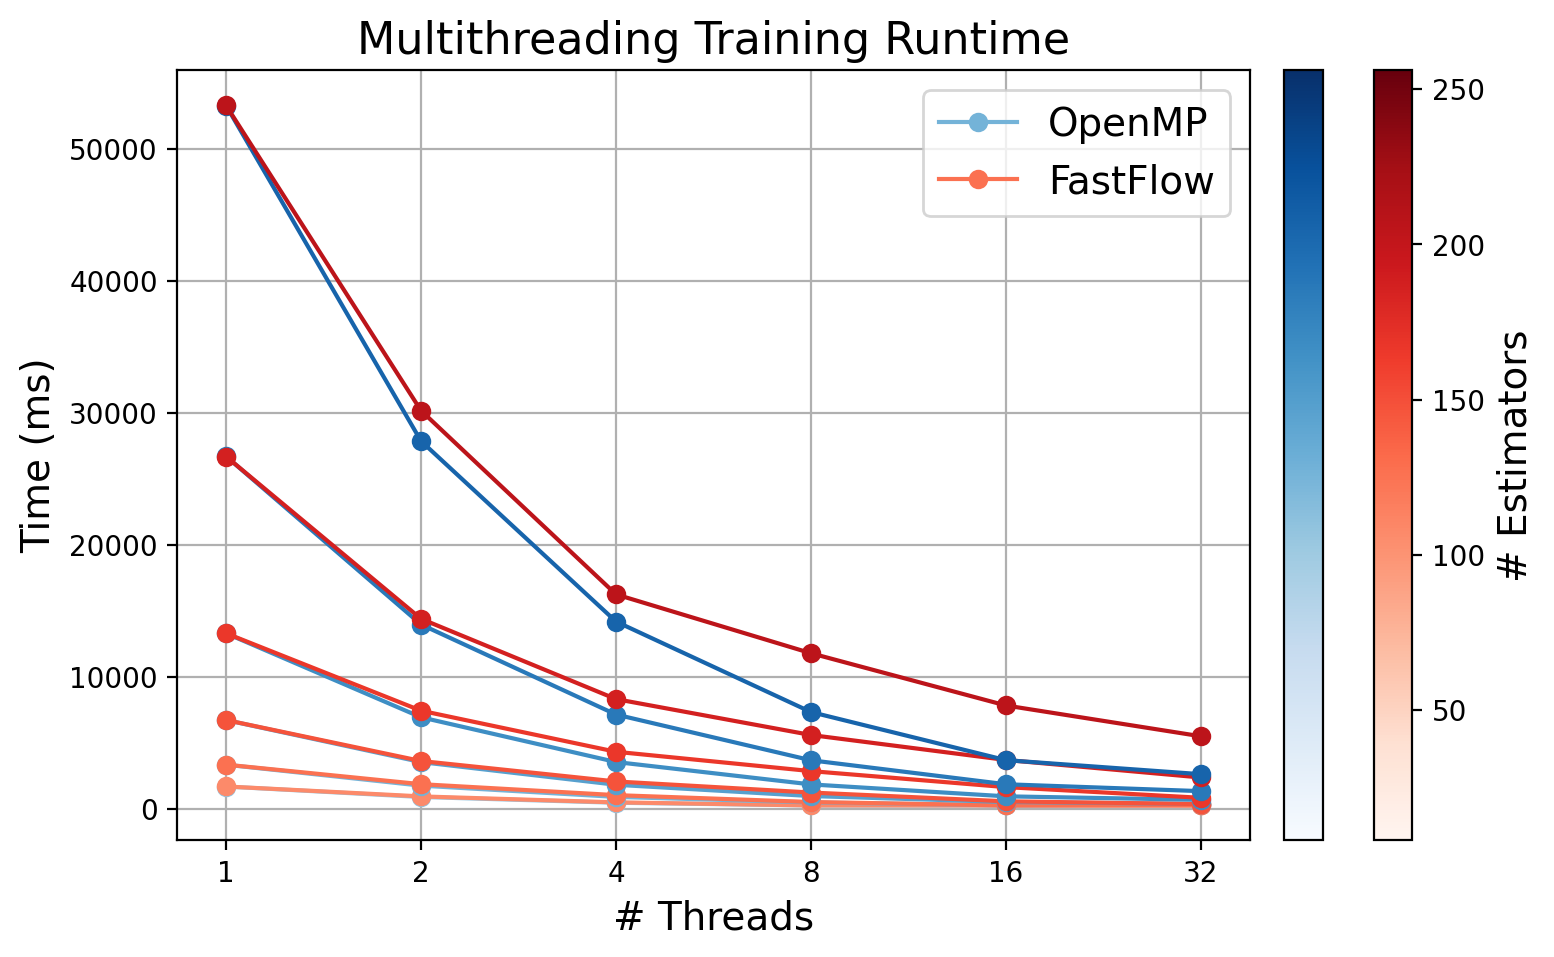

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

omp = df[df["backend"] == "omp"]
ff = df[df["backend"] == "ff"]

estimators = np.sort(df["estimators"].unique())

fig, ax = plt.subplots(figsize=(8, 5), dpi=200)
ax.set_title("Multithreading Training Runtime", fontsize=16)

blues = plt.cm.Blues(np.linspace(0.4, 0.8, len(estimators)))
reds = plt.cm.Reds(np.linspace(0.4, 0.8, len(estimators)))

for i, e in enumerate(estimators):
    omp_e = omp[omp["estimators"] == e]
    ff_e = ff[ff["estimators"] == e]

    ax.plot(omp_e["threads"], omp_e["train_time"], marker="o", color=blues[i])

    ax.plot(ff_e["threads"], ff_e["train_time"], marker="o", color=reds[i])

# ----- COLORBAR -----
norm = Normalize(vmin=estimators.min(), vmax=estimators.max())

sm_omp = ScalarMappable(norm=norm, cmap=plt.cm.Blues)
sm_omp.set_array([])

sm_ff = ScalarMappable(norm=norm, cmap=plt.cm.Reds)
sm_ff.set_array([])

cbar_ff = fig.colorbar(sm_ff, ax=ax, fraction=0.035, pad=0.04)
cbar_ff.set_label(r"# Estimators", fontsize=14)
# cbar_ff.set_ticks([])

cbar_omp = fig.colorbar(sm_omp, ax=ax, fraction=0.035, pad=0.03)
cbar_omp.set_ticks([])

# ----- AXES -----
ax.set_xscale("log", base=2)
ticks = df["threads"].unique()
ax.set_xticks(ticks)
ax.set_xticklabels([str(t) for t in ticks])

ax.set_xlabel("# Threads", fontsize=14)
ax.set_ylabel("Time (ms)", fontsize=14)
ax.grid()

omp_handle = plt.Line2D([], [], color=blues[1], marker="o", label="OpenMP")
ff_handle = plt.Line2D([], [], color=reds[1], marker="o", label="FastFlow")
ax.legend(handles=[omp_handle, ff_handle], fontsize=14)

plt.show()

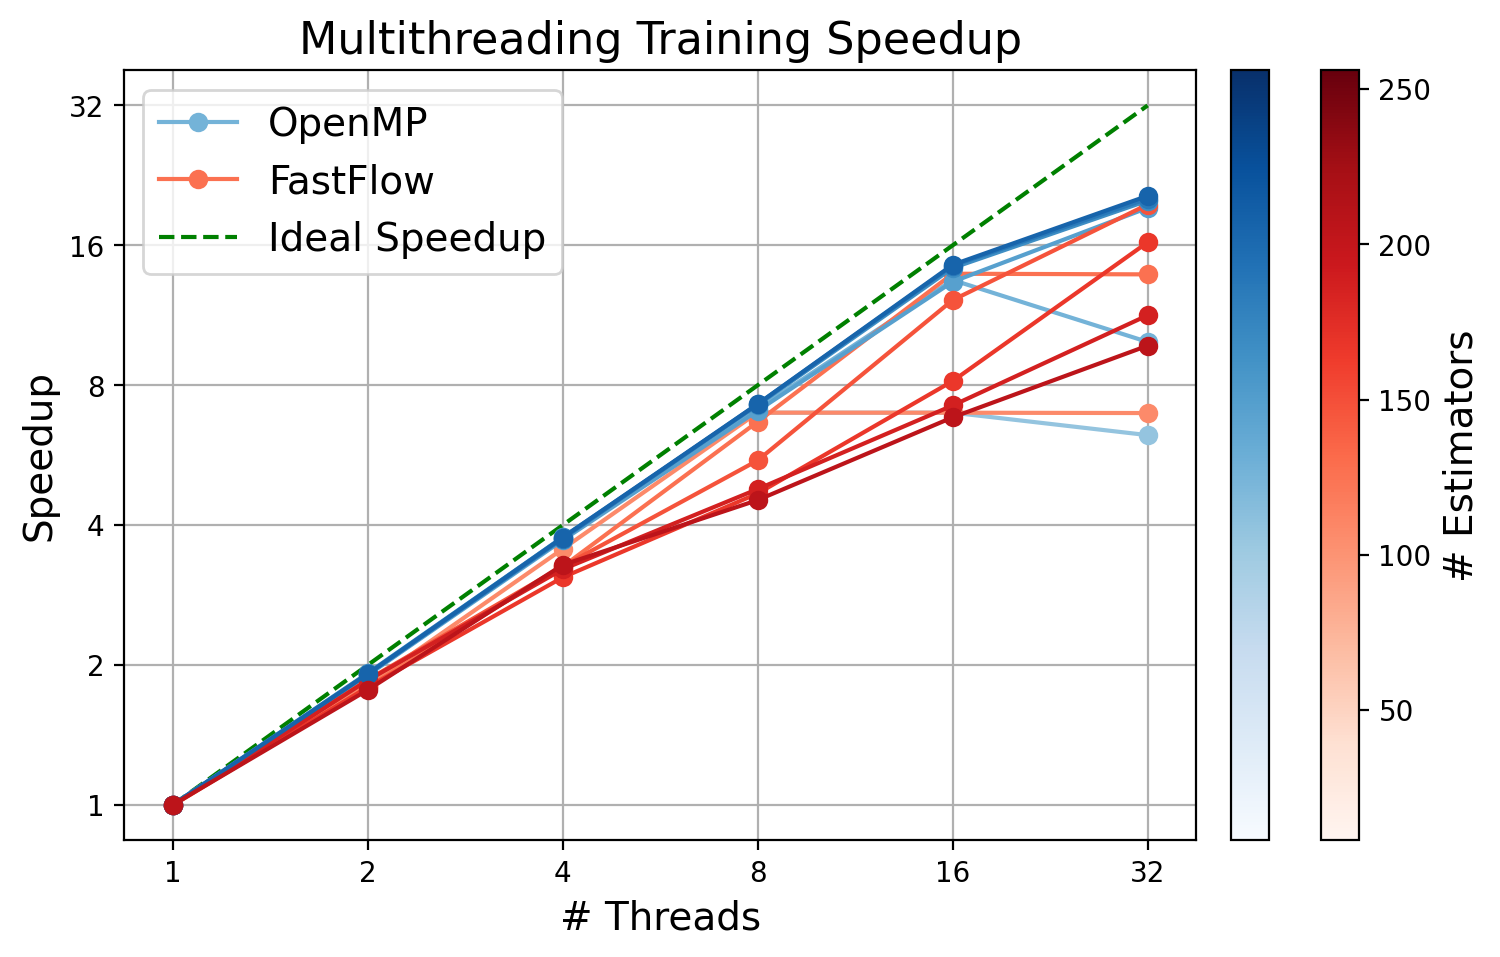

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

omp = df[df["backend"] == "omp"]
ff = df[df["backend"] == "ff"]

estimators = np.sort(df["estimators"].unique())

fig, ax = plt.subplots(figsize=(8, 5), dpi=200)
ax.set_title("Multithreading Training Speedup", fontsize=16)

blues = plt.cm.Blues(np.linspace(0.4, 0.8, len(estimators)))
reds = plt.cm.Reds(np.linspace(0.4, 0.8, len(estimators)))

ax.plot([1, 32], [1, 32], "g--")

for i, e in enumerate(estimators):
    omp_e = omp[omp["estimators"] == e]
    ff_e = ff[ff["estimators"] == e]

    ax.plot(omp_e["threads"], omp_e["train_speedup"], marker="o", color=blues[i])

    ax.plot(ff_e["threads"], ff_e["train_speedup"], marker="o", color=reds[i])

# ----- COLORBAR -----
norm = Normalize(vmin=estimators.min(), vmax=estimators.max())

sm_omp = ScalarMappable(norm=norm, cmap=plt.cm.Blues)
sm_omp.set_array([])

sm_ff = ScalarMappable(norm=norm, cmap=plt.cm.Reds)
sm_ff.set_array([])

cbar_ff = fig.colorbar(sm_ff, ax=ax, fraction=0.035, pad=0.04)
cbar_ff.set_label(r"# Estimators", fontsize=14)
# cbar_ff.set_ticks([])

cbar_omp = fig.colorbar(sm_omp, ax=ax, fraction=0.035, pad=0.03)
cbar_omp.set_ticks([])

# ----- AXES -----
ax.set_xscale("log", base=2)
ax.set_yscale("log", base=2)
ticks = df["threads"].unique()
ax.set_xticks(ticks)
ax.set_xticklabels([str(t) for t in ticks])
ax.set_yticks(ticks)
ax.set_yticklabels([str(t) for t in ticks])

ax.set_xlabel("# Threads", fontsize=14)
ax.set_ylabel("Speedup", fontsize=14)
ax.grid()

omp_handle = plt.Line2D([], [], color=blues[1], marker="o", label="OpenMP")
ff_handle = plt.Line2D([], [], color=reds[1], marker="o", label="FastFlow")
ideal_handle = plt.Line2D([], [], color="green", linestyle="--", label="Ideal Speedup")
ax.legend(handles=[omp_handle, ff_handle, ideal_handle], fontsize=14)

plt.show()

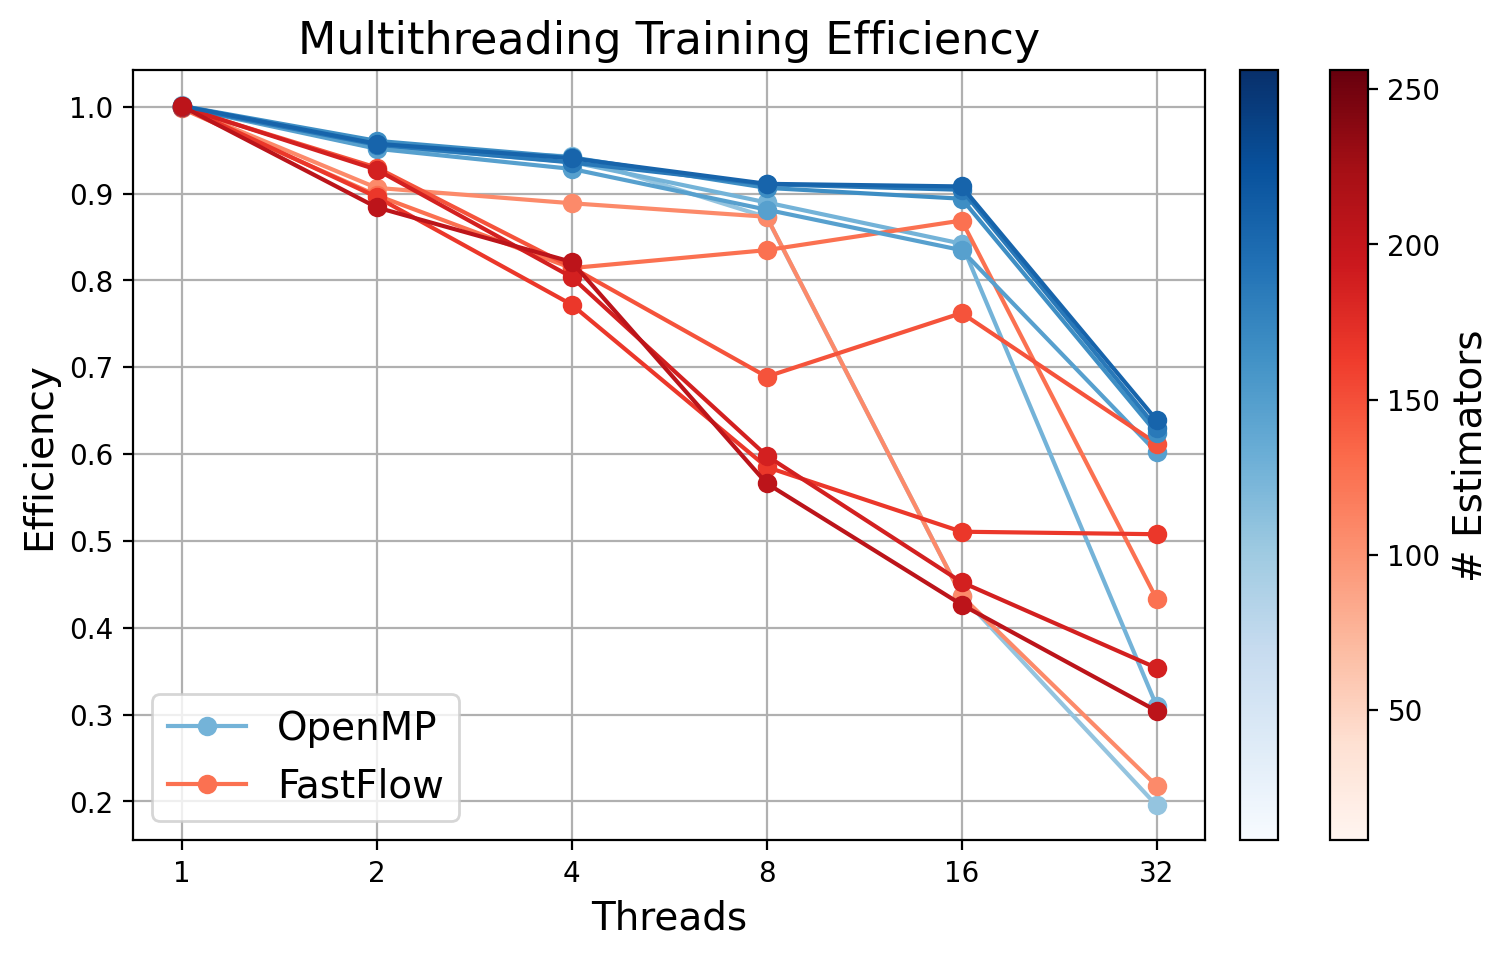

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

omp = df[df["backend"] == "omp"]
ff = df[df["backend"] == "ff"]

estimators = np.sort(df["estimators"].unique())

fig, ax = plt.subplots(figsize=(8, 5), dpi=200)
ax.set_title("Multithreading Training Efficiency", fontsize=16)

blues = plt.cm.Blues(np.linspace(0.4, 0.8, len(estimators)))
reds = plt.cm.Reds(np.linspace(0.4, 0.8, len(estimators)))

for i, e in enumerate(estimators):
    omp_e = omp[omp["estimators"] == e]
    ff_e = ff[ff["estimators"] == e]

    ax.plot(omp_e["threads"], omp_e["train_efficiency"], marker="o", color=blues[i])

    ax.plot(ff_e["threads"], ff_e["train_efficiency"], marker="o", color=reds[i])

# ----- COLORBAR -----
norm = Normalize(vmin=estimators.min(), vmax=estimators.max())

sm_omp = ScalarMappable(norm=norm, cmap=plt.cm.Blues)
sm_omp.set_array([])

sm_ff = ScalarMappable(norm=norm, cmap=plt.cm.Reds)
sm_ff.set_array([])

cbar_ff = fig.colorbar(sm_ff, ax=ax, fraction=0.035, pad=0.04)
cbar_ff.set_label(r"# Estimators", fontsize=14)
# cbar_ff.set_ticks([])

cbar_omp = fig.colorbar(sm_omp, ax=ax, fraction=0.035, pad=0.03)
cbar_omp.set_ticks([])

# ----- AXES -----
ax.set_xscale("log", base=2)
ticks = df["threads"].unique()
ax.set_xticks(ticks)
ax.set_xticklabels([str(t) for t in ticks])

ax.set_xlabel("Threads", fontsize=14)
ax.set_ylabel("Efficiency", fontsize=14)
ax.grid()

omp_handle = plt.Line2D([], [], color=blues[1], marker="o", label="OpenMP")
ff_handle = plt.Line2D([], [], color=reds[1], marker="o", label="FastFlow")
ax.legend(handles=[omp_handle, ff_handle], fontsize=14)

plt.show()

In [6]:
keys = ["estimators", "max_depth"]
merged = seq.merge(df, how="right", on=keys, suffixes=("_seq", "_mt"))

df["predict_speedup"] = merged["test_predict_time_seq"] / merged["test_predict_time_mt"]
df["predict_efficiency"] = df["predict_speedup"] / merged["threads_mt"]

df

,estimators,max_depth,backend,threads,nodes,train_accuracy,train_f1,test_accuracy,test_f1,train_time,train_predict_time,test_predict_time,train_speedup,train_efficiency,predict_speedup,predict_efficiency
0,8,0,ff,1,1,0.984096,0.982388,0.866456,0.846951,1675.8020,18.525560,5.477224,0.999845,0.999845,0.640545,0.640545
1,8,0,ff,2,1,0.984096,0.982388,0.866456,0.846951,924.1472,14.138560,3.577610,1.813068,0.906534,0.980657,0.490328
2,8,0,ff,4,1,0.984096,0.982388,0.866456,0.846951,471.2912,9.462628,3.244700,3.555216,0.888804,1.081273,0.270318
3,8,0,ff,8,1,0.984096,0.982388,0.866456,0.846951,239.8462,10.360372,3.772970,6.985902,0.873238,0.929880,0.116235
4,8,0,ff,16,1,0.984096,0.982388,0.866456,0.846951,239.9160,10.313500,4.961228,6.983869,0.436492,0.707165,0.044198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,256,0,omp,4,1,1.000000,1.000000,0.878812,0.862193,14171.1000,109.894000,28.289020,3.762555,0.940639,3.693426,0.923356
106,256,0,omp,8,1,1.000000,1.000000,0.878812,0.862193,7314.6760,59.110160,15.055020,7.289392,0.911174,6.940104,0.867513
107,256,0,omp,16,1,1.000000,1.000000,0.878812,0.862193,3669.4420,30.440600,8.247186,14.530694,0.908168,12.668976,0.791811
108,256,0,omp,32,1,1.000000,1.000000,0.878812,0.862193,2607.4740,22.212900,6.204600,20.448733,0.639023,16.839667,0.526240


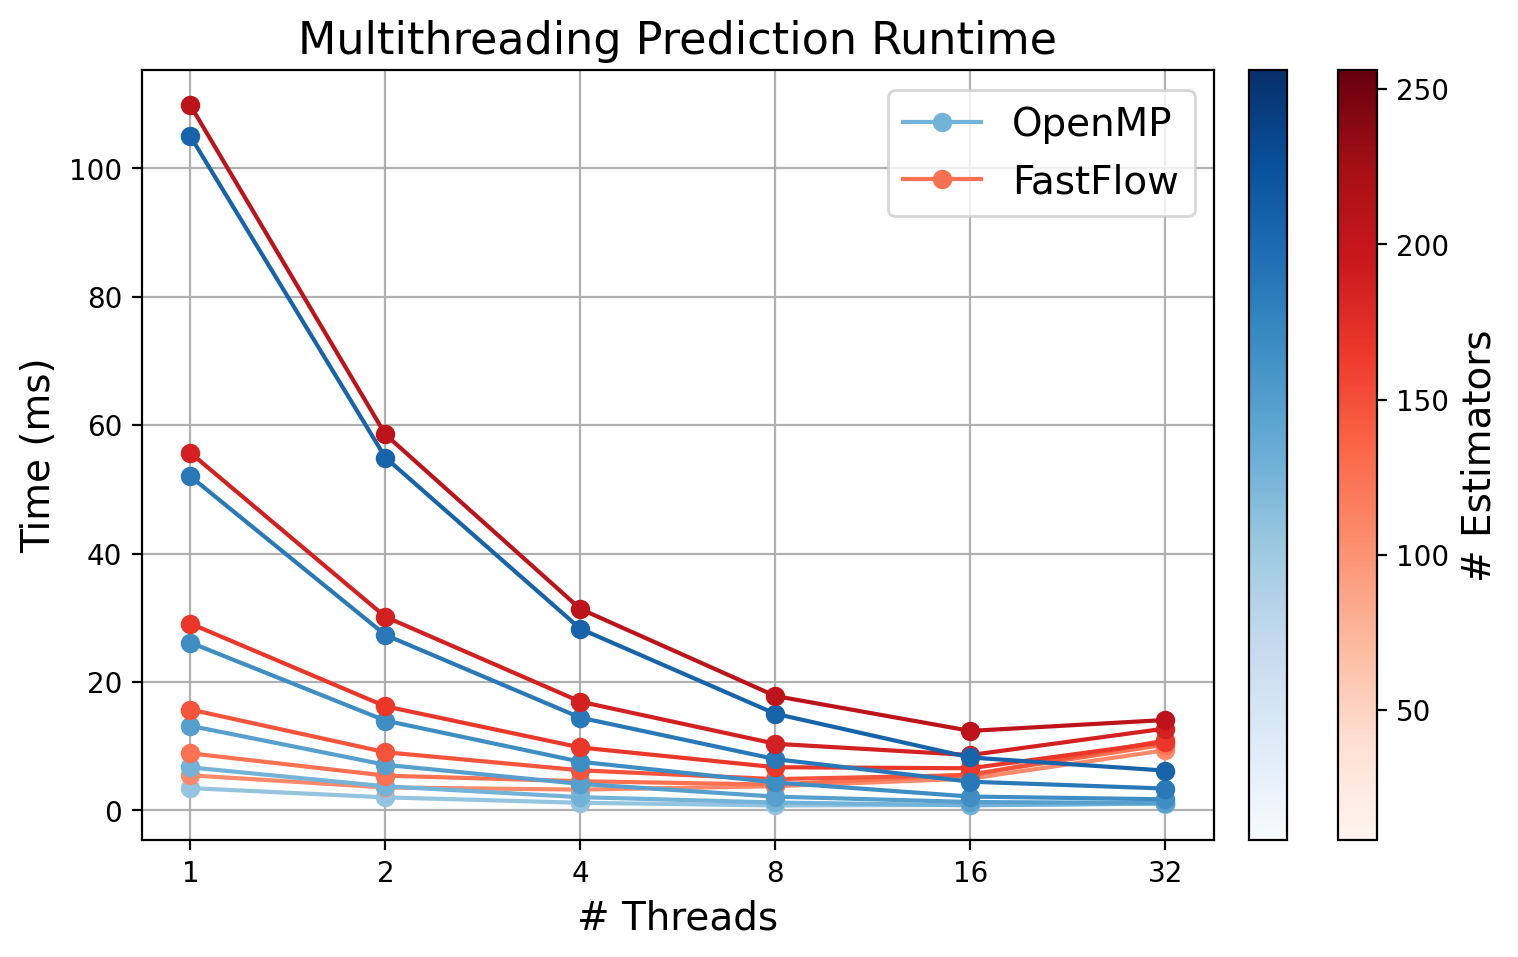

In [7]:
omp = df[df["backend"] == "omp"]
ff = df[df["backend"] == "ff"]

estimators = np.sort(df["estimators"].unique())

fig, ax = plt.subplots(figsize=(8, 5), dpi=200)
ax.set_title("Multithreading Prediction Runtime", fontsize=16)

blues = plt.cm.Blues(np.linspace(0.4, 0.8, len(estimators)))
reds = plt.cm.Reds(np.linspace(0.4, 0.8, len(estimators)))

for i, e in enumerate(estimators):
    omp_e = omp[omp["estimators"] == e]
    ff_e = ff[ff["estimators"] == e]

    ax.plot(omp_e["threads"], omp_e["test_predict_time"], marker="o", color=blues[i])

    ax.plot(ff_e["threads"], ff_e["test_predict_time"], marker="o", color=reds[i])

# ----- COLORBAR -----
norm = Normalize(vmin=estimators.min(), vmax=estimators.max())

sm_omp = ScalarMappable(norm=norm, cmap=plt.cm.Blues)
sm_omp.set_array([])

sm_ff = ScalarMappable(norm=norm, cmap=plt.cm.Reds)
sm_ff.set_array([])

cbar_ff = fig.colorbar(sm_ff, ax=ax, fraction=0.035, pad=0.04)
cbar_ff.set_label(r"# Estimators", fontsize=14)
# cbar_ff.set_ticks([])

cbar_omp = fig.colorbar(sm_omp, ax=ax, fraction=0.035, pad=0.03)
cbar_omp.set_ticks([])

# ----- AXES -----
ax.set_xscale("log", base=2)
ticks = df["threads"].unique()
ax.set_xticks(ticks)
ax.set_xticklabels([str(t) for t in ticks])

ax.set_xlabel("# Threads", fontsize=14)
ax.set_ylabel("Time (ms)", fontsize=14)
ax.grid()

omp_handle = plt.Line2D([], [], color=blues[1], marker="o", label="OpenMP")
ff_handle = plt.Line2D([], [], color=reds[1], marker="o", label="FastFlow")
ax.legend(handles=[omp_handle, ff_handle], fontsize=14)

plt.show()

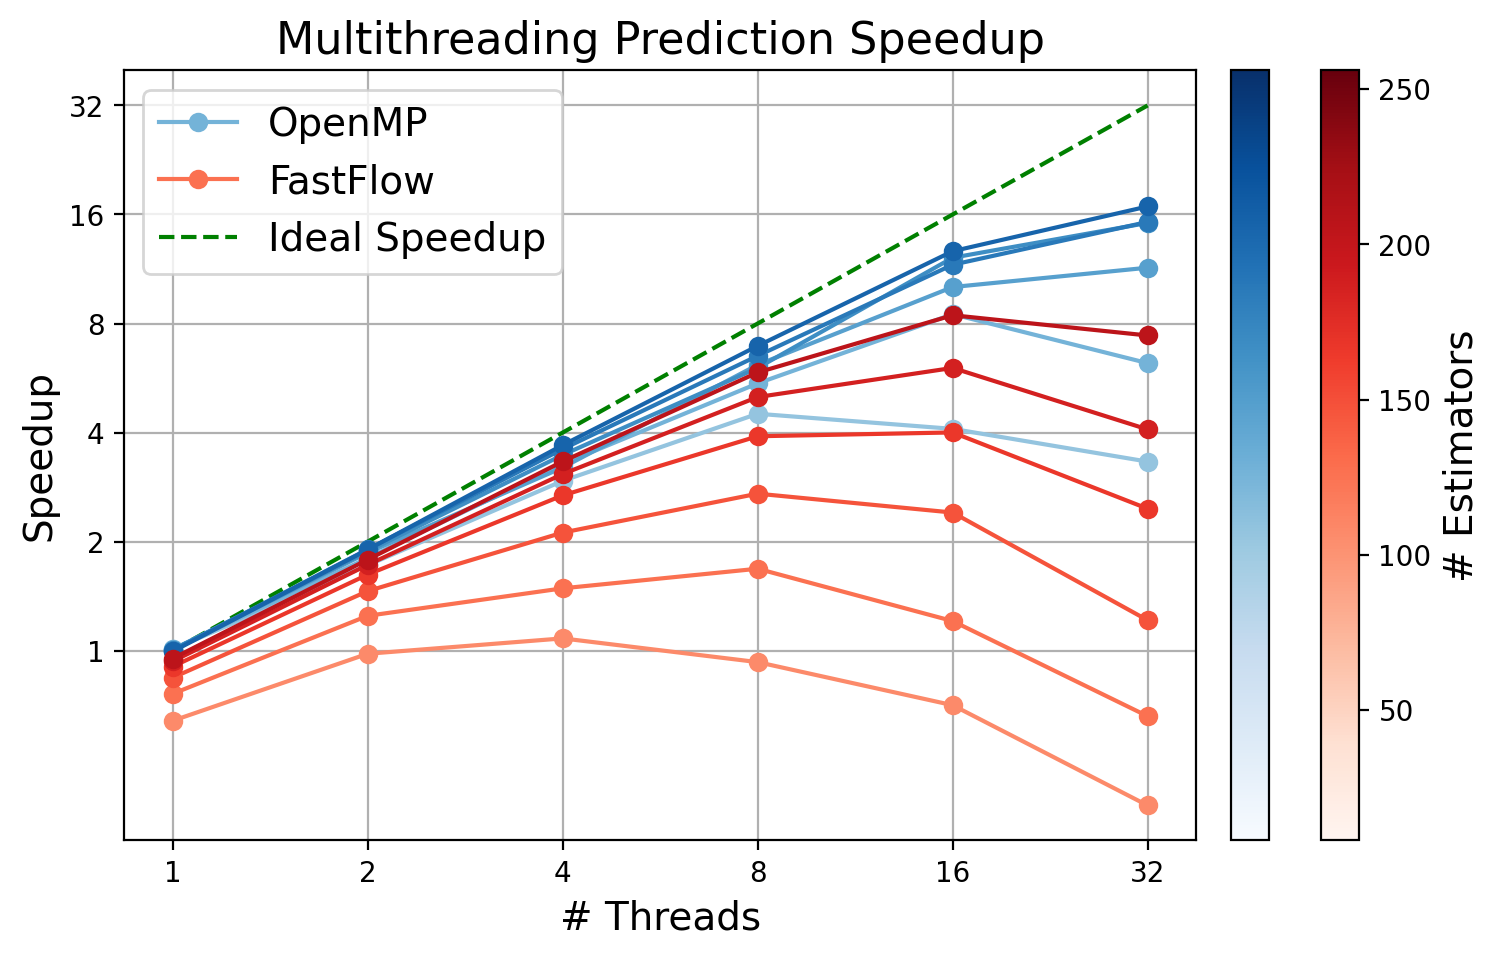

In [8]:
omp = df[df["backend"] == "omp"]
ff = df[df["backend"] == "ff"]

estimators = np.sort(df["estimators"].unique())

fig, ax = plt.subplots(figsize=(8, 5), dpi=200)
ax.set_title("Multithreading Prediction Speedup", fontsize=16)

blues = plt.cm.Blues(np.linspace(0.4, 0.8, len(estimators)))
reds = plt.cm.Reds(np.linspace(0.4, 0.8, len(estimators)))

ax.plot([1, 32], [1, 32], "g--")

for i, e in enumerate(estimators):
    omp_e = omp[omp["estimators"] == e]
    ff_e = ff[ff["estimators"] == e]

    ax.plot(omp_e["threads"], omp_e["predict_speedup"], marker="o", color=blues[i])

    ax.plot(ff_e["threads"], ff_e["predict_speedup"], marker="o", color=reds[i])

# ----- COLORBAR -----
norm = Normalize(vmin=estimators.min(), vmax=estimators.max())

sm_omp = ScalarMappable(norm=norm, cmap=plt.cm.Blues)
sm_omp.set_array([])

sm_ff = ScalarMappable(norm=norm, cmap=plt.cm.Reds)
sm_ff.set_array([])

cbar_ff = fig.colorbar(sm_ff, ax=ax, fraction=0.035, pad=0.04)
cbar_ff.set_label(r"# Estimators", fontsize=14)
# cbar_ff.set_ticks([])

cbar_omp = fig.colorbar(sm_omp, ax=ax, fraction=0.035, pad=0.03)
cbar_omp.set_ticks([])

# ----- AXES -----
ax.set_xscale("log", base=2)
ax.set_yscale("log", base=2)
ticks = df["threads"].unique()
ax.set_xticks(ticks)
ax.set_xticklabels([str(t) for t in ticks])
ax.set_yticks(ticks)
ax.set_yticklabels([str(t) for t in ticks])

ax.set_xlabel("# Threads", fontsize=14)
ax.set_ylabel("Speedup", fontsize=14)
ax.grid()

omp_handle = plt.Line2D([], [], color=blues[1], marker="o", label="OpenMP")
ff_handle = plt.Line2D([], [], color=reds[1], marker="o", label="FastFlow")
ideal_handle = plt.Line2D([], [], color="green", linestyle="--", label="Ideal Speedup")
ax.legend(handles=[omp_handle, ff_handle, ideal_handle], fontsize=14)

plt.show()

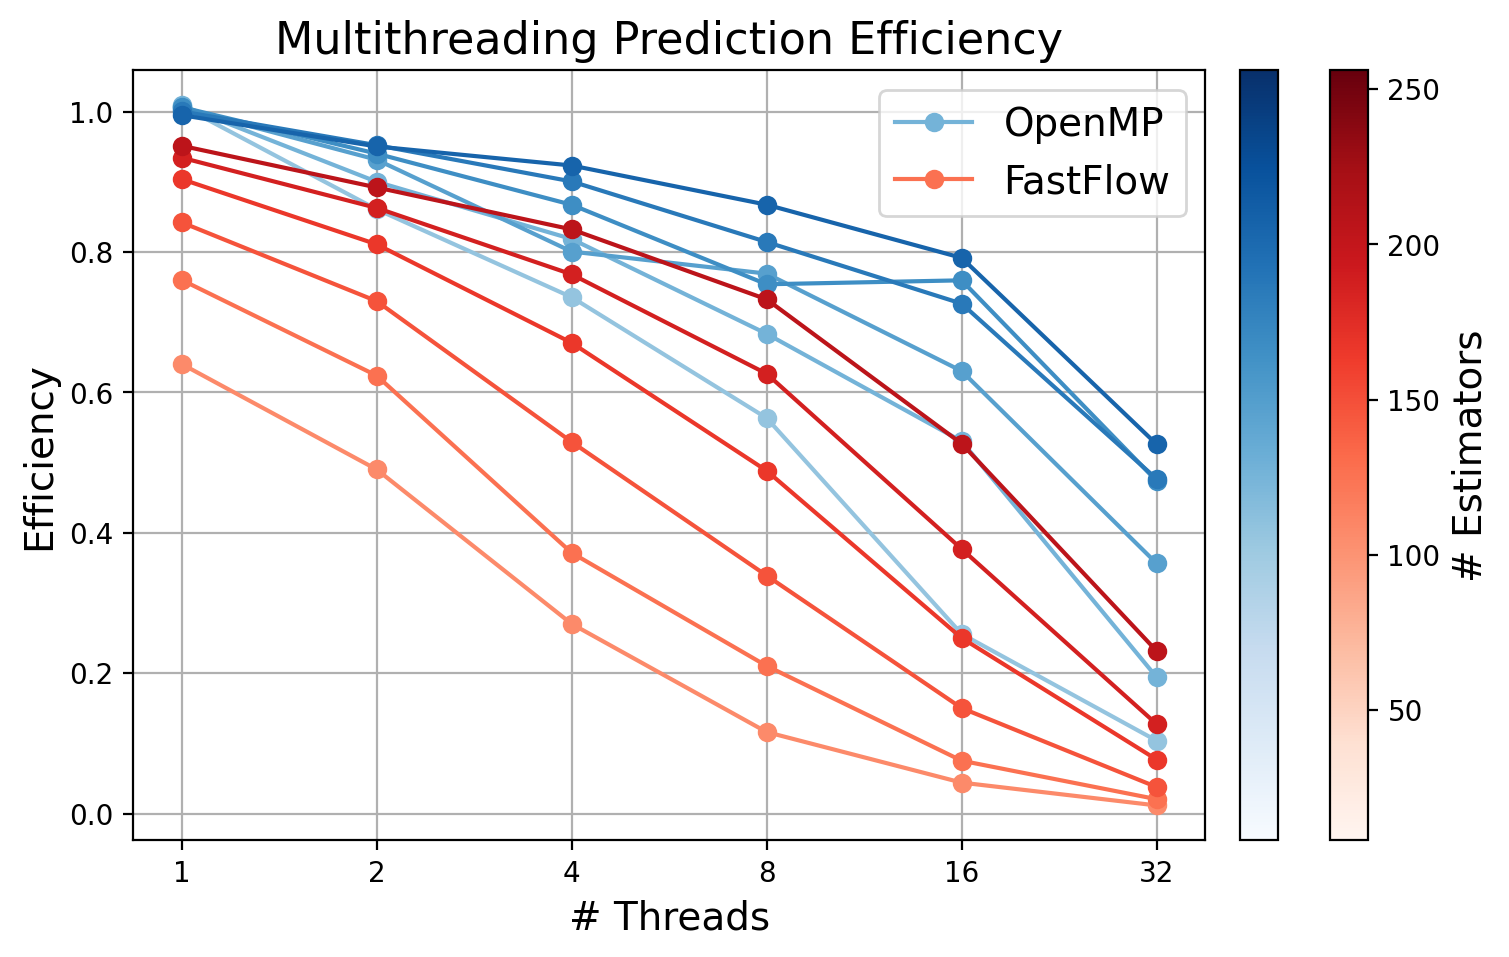

In [9]:
omp = df[df["backend"] == "omp"]
ff = df[df["backend"] == "ff"]

estimators = np.sort(df["estimators"].unique())

fig, ax = plt.subplots(figsize=(8, 5), dpi=200)
ax.set_title("Multithreading Prediction Efficiency", fontsize=16)

blues = plt.cm.Blues(np.linspace(0.4, 0.8, len(estimators)))
reds = plt.cm.Reds(np.linspace(0.4, 0.8, len(estimators)))

for i, e in enumerate(estimators):
    omp_e = omp[omp["estimators"] == e]
    ff_e = ff[ff["estimators"] == e]

    ax.plot(omp_e["threads"], omp_e["predict_efficiency"], marker="o", color=blues[i])

    ax.plot(ff_e["threads"], ff_e["predict_efficiency"], marker="o", color=reds[i])

# ----- COLORBAR -----
norm = Normalize(vmin=estimators.min(), vmax=estimators.max())

sm_omp = ScalarMappable(norm=norm, cmap=plt.cm.Blues)
sm_omp.set_array([])

sm_ff = ScalarMappable(norm=norm, cmap=plt.cm.Reds)
sm_ff.set_array([])

cbar_ff = fig.colorbar(sm_ff, ax=ax, fraction=0.035, pad=0.04)
cbar_ff.set_label(r"# Estimators", fontsize=14)
# cbar_ff.set_ticks([])

cbar_omp = fig.colorbar(sm_omp, ax=ax, fraction=0.035, pad=0.03)
cbar_omp.set_ticks([])

# ----- AXES -----
ax.set_xscale("log", base=2)
ticks = df["threads"].unique()
ax.set_xticks(ticks)
ax.set_xticklabels([str(t) for t in ticks])

ax.set_xlabel("# Threads", fontsize=14)
ax.set_ylabel("Efficiency", fontsize=14)
ax.grid()

omp_handle = plt.Line2D([], [], color=blues[1], marker="o", label="OpenMP")
ff_handle = plt.Line2D([], [], color=reds[1], marker="o", label="FastFlow")
ax.legend(handles=[omp_handle, ff_handle], fontsize=14)

plt.show()